In [ ]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

# 第33章 隨機指標交易策略

## 33.1 什麼是隨機指標（KDJ）？

隨機指標（KDJ）又稱為隨機指數（The Random Index），是一種用於解析市場中超買或者超賣現象的指標，它最早運用於期貨市場，後來在股票解析中被眾多投資者廣泛使用。

從交易原理上來看，KDJ 指標最基礎的交易思想建立在威廉指標（Williams %R，簡稱 W%R）基礎之上，威廉指標由拉裡．威廉斯（Larry R. Williams）在其著作《我如何賺得一百萬》[<sup>1</sup>](#fn1) 中提出。在解析資產的價格時，除了考慮資產每天閉市時的價格（收盤價）以外，還要綜合解析資產開市到收市期間價格的變化情況。

威廉指標的計算方法如下：首先選取一個特定的時間跨度（例如 14 日），找出這一特定區間的最高價和最低價，構成一個價格變化區間；然後分析區間最後一個時間點的收盤價，與期間最高價和最低價的相對位置，根據此一相對位置來衡量市場的超買或者超賣現象。W%R 指標可以用公式表達為：

$$W\%R=\frac{\mbox{最近 $n$ 天內的最高價}-\mbox{第 $n$ 天的收盤價}}{\mbox{最近 $n$ 天內的最高價}-\mbox{最近 $n$ 天內的最低價}}\times 100\%$$

KDJ 指標的最早雛形，是由芝加哥期貨交易商 George Lane 提出的 KD 指標，該指標又被稱為隨機震盪指標（Stochastic Oscillator Indicator）KD 指標的解析思想與威廉指標類似，均使用特定時間跨度中的最後收盤價，與該時間跨度內的最高價和最低價的相對位置來推測市場的超買和超賣情況。與威廉指標不同的地方在於，隨機震盪指標在收盤價與最高價和最低價的相對位置比值上，又融合了移動平均的思想，用更多的資訊來捕捉市場的超買超賣現象。KDJ 指標則是在隨機震盪指標Ｋ線和Ｄ線的基礎上増添一條Ｊ線，進一步提高隨機震盪指標對市場買賣訊號捕捉的周延。

<span><sup>1</sup> Williams，Larry R. How I Made One Million Dollars … Last Year … Trading Commodities. 3rd edition. S.I.: Windsor Books, 1998.</span>

## 33.2 隨機指標的原理

隨機指標（KDJ）綜合考慮特定時間段的最高價、最低價和收盤價資料，根據收盤價在最高價、最低價構成的區間相對位置來反映價格的走勢和價格的波動幅度，使用隨機波動的觀念來捕捉市場的超買或者超賣現象；KDJ 指標又結合統計學原理和移動平均的思想繪製出Ｋ線、Ｄ線和Ｊ線，綜合運用相對強度指標、動量指標和移動平均值的特點來直觀、清晰地刻畫股票的走勢情況。

## 33.3 KDJ 指標的計算公式

KDJ 指標由Ｋ線、Ｄ線和Ｊ線這三條線組成，根據特定的週期（通常為 9 天、9 週等）內資產的最高價、最低價以及最後一個計算時點的收盤價以及這 3 種價格的比例關係，來計算最後一個時點的未成熟隨機值 RSV（Raw Stochastic Value，RSV），進而透過移動平均法來計算Ｋ值、Ｄ值和Ｊ值。將各時點的Ｋ值、Ｄ值和Ｊ值在座標軸上描點，連線這些點即形成Ｋ線、Ｄ線和Ｊ線。和其他指標計算方式一樣，KDJ 指標的計算週期有以日、週、月甚至是年為時間單位。下面以日KDJ 指標為例，我們分別介紹 RSV 值、Ｋ值、Ｄ值和Ｊ值的計算過程。

### 33.3.1 未成熟隨機指標 RSV

計算 RSV 的值是求 KDJ 指標的第一步，RSV 的計算公式為：

$$\mathit{RSV}=\frac{\mbox{第 $n$天的收盤價}-\mbox{最近 $n$ 天內的最低價}}{\mbox{最近 $n$ 天內的最高價}-\mbox{最近 $n$ 天內的最低價}}\times 100,$$

其中 $n$ 為時間跨度。

若用 $\mathit{Close}_t$ 表示 $t$ 時期的收盤價，$\mathit{High}_{[t-n+1,t]}$ 表示 $t-n+1$ 日到第 $t$ 日這 $n$ 日內的最高價，$\mathit{Low}_{[t-n+1,t]}$ 表示 $t-n+1$ 日到第 $t$ 日這 $n$ 日內的最低價，則 $t$ 時期 $\mathit{RSV}_t$ 的計算公式為：

$$\mathit{RSV}_t=\frac{\mathit{Close}_t-\mathit{Low}_{[t-n+1,t]}}{\mathit{High}_{[t-n+1,t]}-\mathit{Low}_{[t-n+1,t]}}.$$

如果設定 $n=9$，當期的收盤價為 50 元，9 日內的最高價為 90 元，最低價位 10 元，則當期 RSV 的取值為：

$$
\begin{split}
\mathit{RSV}&=\frac{50-10}{90-10}\times100\\
&=50
\end{split}
$$

其中，$n$ 為時間跨度，一般取 9 日或者 9 週。

圖 33-1：RSV的直觀展現圖

從圖 33.1 可以看出，若以 9 日為時間跨度，RSV 的分子是第 9 日收盤價減去 9 日內的最低價，分母是 9 日內的最高價與最低價的差值；RSV 藉由分子和分母的比例，刻畫出第 9 日收盤價在 9 日內最高價和最低價所構成的區間中的相對位置。RSV 也因此被解讀為市場中買盤力道的相對強弱。

RSV 的取值範圍在 0 到 100 之間，RSV 的取值越大，說明收盤價在價格區間中的相對位置較高，市場中可能出現超買現象；RSV 取值較低時，收盤價的相對位置偏低，市場中可能出現超賣行情。

運用標準普爾 500 指數（S&P 500 Index）在 2014 年 1 月 1 日到 2015 年 4 月 30 日的日度交易資料，以 9 天為時間跨度，用 Python 來計算其 RSV 值。

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False
# 讀取標普 500 的交易資料
GSPC=pd.read_csv('.\\PythonBook_code_data\\part5\\33\\GSPC.csv',index_col='Date')
GSPC=GSPC.iloc[:,1:]
GSPC.index=pd.to_datetime(GSPC.index)
GSPC.head()
# 擷取收盤價、最高價、最低價資料
Close=GSPC.Close
High=GSPC.High
Low=GSPC.Low
ndate=len(Close)
# 計算 9 日未成熟隨機指標 RSV 的值
RSV=[]
for j in range(8,ndate):
    periodHigh=np.max(High[(j-8):(j+1)])
    periodLow=np.min(Low[(j-8):(j+1)])
    RSV.append(100*(Close[j]-periodLow)\
            /(periodHigh-periodLow))

# 查詢 RSV 前 6 期取值
RSV=pd.Series(RSV,index=Close.index[8:])
RSV.name='RSV'
RSV.head()

Date
2014-01-14    76.994107
2014-01-15    93.035207
2014-01-16    85.985395
2014-01-17    65.628444
2014-01-21    80.068155
Name: RSV, dtype: float64

對標普 500 指數 9 日 RSV 資料進行簡要說明性解析。

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000265B7536860>,
      dtype=object)

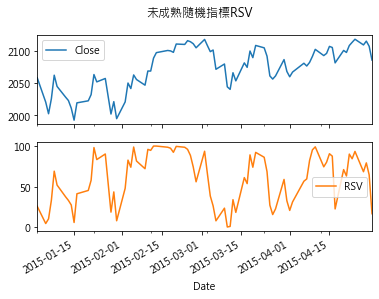

In [7]:
RSV.describe()
# 繪製標普500指數收盤價曲線圖和RSV曲線圖
Close1=Close['2015']
RSV1=RSV['2015']
Cl_RSV=pd.DataFrame([Close1,RSV1]).transpose()
Cl_RSV.plot(subplots=True,title='未成熟隨機指標RSV')

圖 33.2：標普500指數收盤價與RSV曲線圖

從圖 33.2 中可以看出，RSV 取值範圍在 0 到 100 之間，波動範圍較大。此外，有不少時候 RSV 取值接近於 0 或者 100。

接下來，再繪製標普 500 指數 2015 年日Ｋ線圖，從蠟燭圖中綜合解析日度資料的最高價、最低價和收盤價資料，進一步對照 RSV 的取值情況。

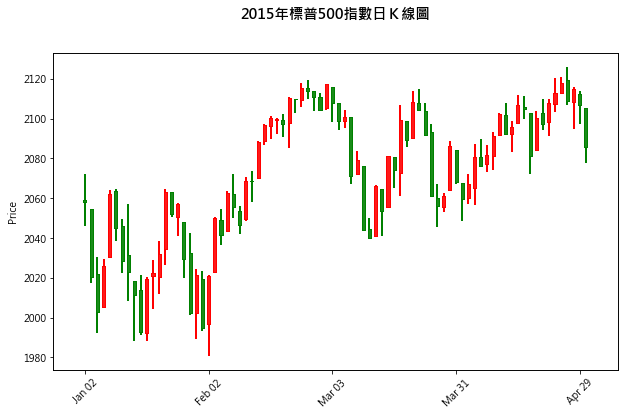

In [8]:
# 截取 2015 年交易資料
GSPC2015=GSPC['2015']
# 繪製標普500指數2015年日Ｋ線圖
import candle
candle.candlePlot(GSPC2015,\
                '2015年標普500指數日Ｋ線圖')

圖33.3：標普500指數日K圖

從圖 33.3 中可以看出，2015 年 2 月份市場處於上漲行期中，蠟燭圖的上影線較短或者沒有上影線，在部分交易日中標普 500 指數的收盤價等於 9 天內的最高價，由 RSV 的計算公式

$$\mathit{RSV}={\mbox{第 $n$ 天的收盤價}-\mbox{最近 $n$ 天內的最低價}}{\mbox{最近 $n$ 天內的最高價}-\mbox{最近 $n$ 天內的最低價}}\times100$$

和 $n=9$ 可推知，若收盤價等於 9 日的最高價，RSV 的取值則為 100。在 3 月份初期，市場處於下跌行期，綠色蠟燭圖的下影線較短或者幾乎沒有，收盤價很有可能等於 9 天內的最低價，若當期收盤價接近於 9 天的最低價，則可推知當期 RSV 的取值接近於 0。

從上可以歸納出一個規律，當市場處於連續上漲行期中，未成熟隨機指標 RSV 取值也逐漸增大，而且有可能在較多日期中取值為 100；當市場處於連續下跌行期中，RSV 取值可能在較多日期中取值為 0。當 RSV 連續多期取值 100 或者 0，RSV 則會出現所謂「鈍化」的現象，例如，當收盤價在上漲行凊高位變化時，RSV 在一段時間內取值均為 100，不隨收盤價的變化而波動，則失去了捕捉收盤價變化的作用。

為了解決 RSV 波動幅度較大的問題，我們引入Ｋ指標，它是對 RSV 值進行平滑得到的結果。

### 33.3.2 Ｋ、Ｄ指標計算

Ｋ值由前一期的Ｋ值和當期 RSV 值經過一定權重調整後相加而得到，一般來說，Ｋ值的計算為

$$\mbox{Ｋ值}=\frac{2}{3}\times\mbox{前一日Ｋ值}+\frac{1}{3}\times\mbox{當日}\mathit{RSV},$$

第 $t$ 日Ｋ值計算公式為：

$$K_t=\frac{2}{3}\times K_{t-1}+\frac{1}{3}\times\mathit{RSV}_t.$$

其中，$K_t$ 為第 $t$ 日Ｋ值，$K_{t-1}$ 為第 $t-1$ 日Ｋ值，$\mathit{RSV}_t$ 表示第 $t$ 日的 RSV 值。假設 $K_1=30$，$\mathit{RSV}_2=60$，則：

$$
\begin{split}
K_2&=\frac{2}{3}\times K_1+\frac{1}{3}\times\mathit{RSV}_2\\
&=\frac{2}{3}\times30+\frac{1}{3}\times60\\
&=40
\end{split}
$$

Ｄ值則是由前一期的Ｄ值和當期Ｋ值經過一定權重相加而得的。一般來說，Ｄ值的計算方法為：

$$\mbox{Ｄ值}=\frac{2}{3}\times\mbox{前一日Ｄ值}+\frac{1}{3}\times\mbox{當日Ｋ值},$$

第 $t$ 日Ｄ值計算公式為：

$$D_t=\frac{2}{3}\times D_{t-1}+\frac{1}{3}\times K_t.$$

其中，$D_t$ 為第 $t$ 日Ｄ值，$D_{t-1}$ 為第 $t-1$ 日Ｄ值，$K_t$ 為第 $t$ 日Ｋ值。

在計算第 1 期的Ｋ值和Ｄ值時，如果沒有指定，則Ｋ值和Ｄ值預設取值為 50。在Ｋ值和Ｄ值的求解過程中，平滑權重 $2/3$ 和 $1/3$ 是較為常用的權重，這兩個權重也可以根據股價走勢的特點進行適當修改。

令 $K_t=50$，$D_1=50$，可以推出Ｋ值是由未成熟隨機指標 RSV 透過指數移動平均（Exponential Moving Average，EMA）而得到。同理，Ｄ值是Ｋ值的指數移動平均數（EMA）。

接下來，我們用 Python 撰寫程式碼計算Ｋ值和Ｄ值。

In [10]:
# 計算Ｋ,Ｄ值
K=[50]
D=[50]
for i in range(len(RSV)):
    KValue = (2/3)*K[-1] + (RSV[i]/3)
    DValue = (2/3)*D[-1] + KValue/3
    K.append(KValue)
    D.append(DValue)

K=pd.Series(K[1:],index=RSV.index)
K.name='KValue'
K.head()
D=pd.Series(D[1:],index=RSV.index)
D.name='DValue'
D.head()

Date
2014-01-14    52.999345
2014-01-15    58.780817
2014-01-16    64.373090
2014-01-17    66.998029
2014-01-21    69.616905
Name: DValue, dtype: float64

以標普 500 指數 2015 年資料為例，繪製曲線圖，直觀展示 RSV、Ｋ值和Ｄ值的取值情況。

No handles with labels found to put in legend.


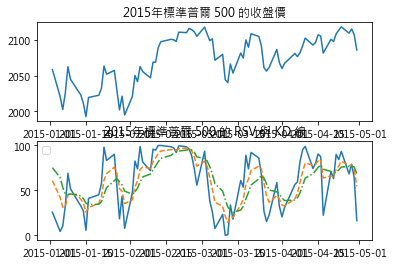

In [11]:
plt.subplot(211)
plt.title('2015年標準普爾 500 的收盤價')
plt.plot(Close['2015'])
plt.subplot(212)
plt.title('2015年標準普爾 500 的 RSV 與 KD 線')
plt.plot(RSV['2015'])
plt.plot(K['2015'],linestyle='dashed')
plt.plot(D['2015'],linestyle='-.')
plt.legend(loc='upper left')

圖 33.4：RSV與KD線

從圖 33.4 中，可以看出 RSV 曲線波動最大，Ｋ線在 RSV 基礎上進行適當平滑，Ｄ線波動幅度最小。結合收盤價曲線解析，可以看出當收盤價曲線上漲時，RSV 曲線、ＫＤ線也呈現上升趨勢；當收盤價在高位段上漲時，觀察 2015 年 2 月 17 日前後的曲線走勢，RSV、Ｋ值和Ｄ值的取值也較高，並且在取值較高位處波動。

### 33.3.3 Ｊ指標計算

Ｊ指標是 ＫＤ指標的輔助指標，進一步反映了Ｋ指標和D指標的乖離程度。第 $t$ 日Ｊ值其計算公式為：

$$J_t=3\times K_t-2\times D_t,$$

其中，$J_t$ 為第 $t$ 日Ｊ值，$K_t$ 為第 $t$ 日Ｋ值，$D_t$ 為第 $t$ 日Ｄ值。

### 33.3.4 KDJ 指標簡要解析

經過前面幾步的計算，已經得出 RSV 值、Ｋ值、Ｄ值和Ｊ值，接下來，繪製標普 500 資料 KDJ 指標曲線圖，比對價格與 KDJ 指標的取值情況。

圖 33.5，標普500指數蠟燭圖與KDJ指標線圖

從圖 33.5 可以看到，KDJ 指標的四種線圖與收盤價曲線走勢大致相同，在 KDJ 指標的四種線圖中，RSV 線的波動幅度較大，Ｋ線與Ｄ線的走勢很類似，Ｊ線與Ｋ、Ｄ線走勢相較波動略大。在四種指標的取值上，RSV、Ｋ值和Ｄ值的取值範圍都在 0 到 100 之間；而Ｊ值的取值可以超過 100，也可以低於 0，例如，從Ｊ線圖中可以看出Ｊ值的取值範圍為 -20 到 120。

## 33.4 KDJ 指標的交易策略

總結隨機指標 KDJ 的思想，首先計算最高價、最低價、和收盤價之間的比例關係，再運用均線平滑及乖離的思想，來捕捉動量及超買超賣等現象，在實務上對快捷直觀地研判行情提出一種參考。為了讓讀者對 KDJ 的應用有初步體會，接下來闡述 3 種簡單的 KDJ 指標交易策略

在 KDJ 指標的取值上，Ｋ值與Ｄ值的取值範圍是 0 到 100。依據Ｋ值與Ｄ值可以劃分出超買超賣區，一般而言，Ｋ值或者Ｄ值取值在 80 以上為超買區；Ｋ值或者Ｄ值取值在 20 以下為超賣區。對於Ｊ值，當Ｊ值大於 100，可以視為超買區，當Ｊ值小於 0，視為超賣區。此外，在Ｋ線、Ｄ線的交叉情況也可以釋放出買入賣出訊號。當Ｋ線由下向上穿過Ｄ線時，即出現所謂「黃金交叉」現象，隱藏式股票價格上漲的動量較大，釋放出買入訊號；當Ｋ線由上向下穿過Ｄ線時，出現「死亡交叉」現象，股票有下跌的趨勢，釋放出賣出訊號。

## 33.5 KDJ 指標交易實測

### 33.5.1 ＫＤ指標交易策略

本節將透過Ｋ線、Ｄ線分別捕捉超買點和超賣點，構造交易策略函數，計算ＫＤ指標交易策略的收益率，再對ＫＤ指標交易策略進行評價。

1. 計算ＫＤ指標釋放的買賣訊號

In [12]:
# Ｋ、Ｄ捕捉超買、超賣訊號
# Ｋ值大於85，超買、Signal為-1；
# Ｋ值大於20，超賣、Signal為1；
# Ｄ值大於80，超買、Signal為-1；
# Ｄ值大於20，超賣、Signal為1；
KSignal=K.apply(lambda x: -1 if x>85 else 1 if x<20 else 0)
DSignal=D.apply(lambda x: -1 if x>80 else 1 if x<20 else 0)
KDSignal=KSignal+DSignal
KDSignal.name='KDSignal'
# Ｋ,Ｄ兩者任一出現超賣信號，則為1
KDSignal[KDSignal>=1]=1
# Ｋ,Ｄ兩者任一出現超買信號，則為-1
KDSignal[KDSignal<=-1]=-1
KDSignal.head(n=3)
KDSignal[KDSignal==1].head(n=3)

Date
2014-02-03    1
2014-02-04    1
2014-02-05    1
Name: KDSignal, dtype: int64

2. 定義交易策略函數，用ＫＤ指標交易訊號進行交易實測。

In [17]:
# 定義交易策略函數
def trade(Signal,price):
    ret=(price-price.shift(1))/price.shift(1)
    ret.name='ret'
    signal=Signal.shift(1)
    tradeRet=(ret*signal).dropna()
    tradeRet.name='tradeRet'
    tradeRet[tradeRet==-0]=0
    Returns=pd.merge(pd.DataFrame(ret),\
                     pd.DataFrame(tradeRet),\
                     left_index=True,\
                     right_index=True).dropna()
    return(Returns)

KDtrade=trade(KDSignal,Close)
KDtrade.rename(columns={'ret':'Ret',\
                        'tradeRet':'KDtradeRet'},\
                        inplace=True)
print(KDtrade.head())

                 Ret  KDtradeRet
Date                            
2014-01-15  0.005166         0.0
2014-01-16 -0.001347         0.0
2014-01-17 -0.003895         0.0
2014-01-21  0.002774         0.0
2014-01-22  0.000575         0.0


3. ＫＤ指標交易策略回測及評價。

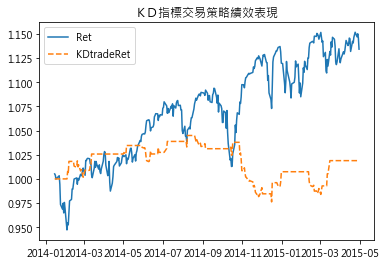

In [22]:
# 構造回測函數
import ffn
def backtest(ret,tradeRet):
    def performance(x):
        winpct=len(x[x>0])/len(x[x!=0])
        annRet=(1+x).cumprod()[-1]**(245/len(x))-1
        sharpe=ffn.calc_risk_return_ratio(x)
        maxDD=ffn.calc_max_drawdown((1+x).cumprod())
        perfo=pd.Series([winpct,annRet,sharpe,maxDD],\
        index=['win rate','annualized return',\
        'sharpe ratio','maximum drawdown'])
        return(perfo)
    BuyAndHold=performance(ret)
    Trade=performance(tradeRet)
    return(pd.DataFrame({ret.name:BuyAndHold,\
           tradeRet.name:Trade}))

# 對ＫＤ指標交易策略進行回測
backtest(KDtrade.Ret,KDtrade.KDtradeRet)
cumRets1=(1+KDtrade).cumprod()
plt.plot(cumRets1.Ret,label='Ret')
plt.plot(cumRets1.KDtradeRet,'--',\
         label='KDtradeRet')
plt.title('ＫＤ指標交易策略績效表現')
plt.legend()

圖 33.6：標普500指數2014到2015年ＫＤ指標交易策略表現

如圖 33.6 所示，在 2014 年初到 10 月份，ＫＤ指標交易的累計收益率表現很好，從 2014 年 11 月開始到 2015 年，該指標則表現不佳。整體而言，在獲勝率（win rate）、年化收益率（annualized return）和夏普比率（sharpe ratio）方面，2014 年到 2015 年 4月 份的ＫＤ指標交易策略績效不如原標普 500 指數本身的績效。ＫＤ指標交易的回撤反而較大。

如果我們截取 2014 年 10 月 10 日以前的資料，再進行交易後測，則ＫＤ指標的績效會明顯變好。

D:\myProgram\Portable Python 3.6.5 x64 R2\App\Python\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


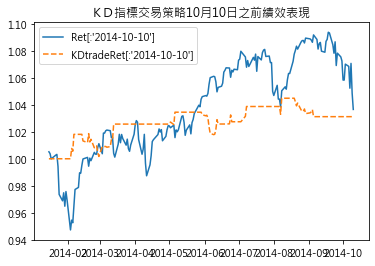

In [24]:
backtest(KDtrade.Ret[:'2014-10-10'],\
         KDtrade.KDtradeRet[:'2014-10-10'])
cumRets2=(1+KDtrade[:'2014-10-10']).cumprod()
plt.plot(cumRets2.Ret,\
        label='''Ret[:'2014-10-10']''')
plt.plot(cumRets2.KDtradeRet,'--',\
        label='''KDtradeRet[:'2014-10-10']''')
plt.title('ＫＤ指標交易策略10月10日之前績效表現')
plt.legend(loc='upper left')
plt.show()

圖 33.7：標普500指數2014上半年ＫＤ指標交易策略表現

對比圖 33.6 和圖 33.7，我們可以看出，ＫＤ指標在 2014 年上半年績效表現優秀，但在 2014 年下半年和 2015 年表現較差。漢代散文家桓寬曾提出一句名言：「明者因時而變，知者隨事而制」。在金融市場投資實戰中，更是如此。在實際運用ＫＤ指標時，除了謹記指標有一定的適用情境，運用更要因時制宜，才能趨利避害。

### 33.5.2 KDJ 指標交易策略

Ｊ線綜合了Ｋ線和Ｄ線的資訊，對於市場超買超賣行情的判斷也有一定的作用。Ｊ值取值範圍不侷限於 0 到 100 之間，但Ｊ值低於 0 或者高於 100 出現的時機不多，當Ｊ值低於 0 時或者高於 100 時，預示著市場多空雙方的力量可能會出現一些微妙的變化，該指標往往會有較高的可靠程度。接下來，在ＫＤ指標的基礎上，加入Ｊ指標交易策略，修改買賣點交易訊號，並進行交易後測。

In [25]:
## Ｊ值定義超買超賣
# Ｊ值大於100，超買；
# Ｊ值小於0，超賣
JSignal=J.apply(lambda x: -1 if x>100 else 1 if x<0 else 0)
KDJSignal=KSignal+DSignal+JSignal
KDJSignal=KDJSignal.apply(lambda x: 1 if x>=2 else -1 if x<=-2 else 0)
KDJtrade=trade(KDJSignal,Close)
KDJtrade.raname(columns={'ret':'Ret',\
            'tradeRet':'KDJtradeRet'},\
            inplace=True)
backtest(KDJtrade.Ret,KDJtrade.KDJtradeRet)
KDJCumRet=(1+KDJtrade).cumprod()
plt.plot(KDJCumRet.Ret,label='Ret')
plt.plot(KDJCumRet.KDJtradeRet,'--',\
            label='KDJtradeRet')
plt.title('KDJ指標交易策略績效表現')
plt.legend(loc='upper left')
plt.show()

NameError: name 'J' is not defined

圖 33.8：標普500指數2014到2015年ＫＤ指標交易策略表現

### 33.5.3 Ｋ線、Ｄ線「金叉」與「死叉亅

在前面的解析中，我們觀察到Ｋ線、Ｄ線與巿場價格曲線的走勢大致相同，Ｋ線與Ｄ線的價格走勢也蘊含著市場買賣雙方力量的博弈。一般而言，在上漲行情中，Ｋ線向上突破Ｄ線，即出現ＫＤ線「黃金交叉」現象，此時，說明市場中多頭力量在加強，可以解讀為市場繼續處於多頭行情。另一方面，在下跌行情中，Ｋ線又向下跌破Ｄ線，即出現ＫＤ線「死亡交叉」現象，說明市場中多頭力量減弱，市場繼續處於空頭下跌行情中。

接下來，繼續以標普 500 指數為例，來探究ＫＤ線「黃金交叉」與「死亡交叉」策略。

In [28]:
## ＫＤ線「黃金交叉」
# 定義向上突破函數
def upbreak(Line,RefLine):
    signal=np.all([Line>RefLine,\
                   Line.shift(1)<RefLine.shift(1)],\
                   axis=0)
    return(pd.Series(signal[1:],\
            index=Line.index[1:]))

# ＫＤ黃金交叉捕捉
KDupbreak=upbreak(K,D)*1
KDupbreak[KDupbreak==1].head()
## ＫＤ線「死亡交叉」
# 定義向下突破函數
def downbreak(Line,RefLine):
    signal=np.all([Line<RefLine,\
                   Line.shift(1)>RefLine.shift(1)],\
                   axis=0)
    return(pd.Series(signal[1:],\
            index=Line.index[1:]))

# ＫＤ死亡交叉捕捉
KDdownbreak=downbreak(K,D)*1
KDdownbreak[KDdownbreak==1].head()
# 計算收盤價變化量
Close=Close['2014-01-14':]
difClose=Close.diff()
# 價格上漲用1表示，價格下跌用-1表示
prctrend=2*(difClose[1:]>=0)-1
prctrend.head()
# 制定ＫＤ黃金交叉的交易訊號
# 上漲行情中，Ｋ向上突破Ｄ，做多
KDupSig=(KDupbreak[1:]+prctrend)==2
KDupSig.head(n=3)
# 制定ＫＤ死亡交叉的交易訊號
# 下跌行情中，Ｋ向下突破Ｄ，做空
KDdownSig=(KDdownbreak[1:]==1)&(prctrend==-1)
KDdownSig.head()
# 綜合「黃金交叉」與「死亡交叉」訊號
breakSig=KDupSig*1+KDdownSig*-1
breakSig.name='breakSig'
breakSig.head()
# ＫＤ交叉策略實測
KDbreak=trade(breakSig,Close)
KDbreak.rename(columns={'ret':'Ret',\
                'tradeRet':'KDbreakRet'},\
                inplace=True)
print(KDbreak.head())

                 Ret  KDbreakRet
Date                            
2014-01-16 -0.001347         0.0
2014-01-17 -0.003895         0.0
2014-01-21  0.002774         0.0
2014-01-22  0.000575         0.0
2014-01-23 -0.008890         0.0


最後，對ＫＤ線「黃金交叉」與「死亡交叉」策略進行後測與評價。

D:\myProgram\Portable Python 3.6.5 x64 R2\App\Python\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  


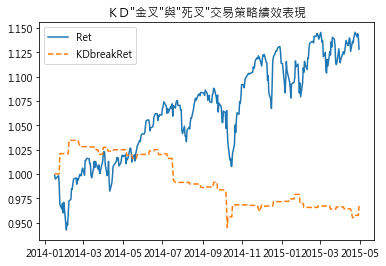

In [29]:
backtest(KDbreak.Ret,KDbreak.KDbreakRet)
KDbreakRet=(1+KDbreak).cumprod()
plt.plot(KDbreakRet.Ret,label='Ret')
plt.plot(KDbreakRet.KDbreakRet,'--',\
            label='KDbreakRet')
plt.title('ＫＤ"金叉"與"死叉"交易策略績效表現')
plt.legend(loc='upper left')
plt.show()

圖 33.9：標普500指數2014到2015年ＫＤ線交叉策略表現

根據圖 33.9，從 2014 年初到 2015 年，以上述策略對標普 500 指數進行交易，表現並不理想。以上的交易策略示範表明一個重要的事實，即無論是Ｋ、Ｄ、Ｊ值的取值範圍策略還是Ｋ線與Ｄ線的突破策略，都只是從特定角度研判巿場並給出交易訊號；此種判斷方式固然有其依據，卻也不免失之偏頗。這誠然是大部份指標的侷限，但我們若能熟悉指標原理並審時度勢，指標的運用之妙，其實是存乎一心的。